In [2]:
#Libraries
import pandas as pd
import camelot
from os.path import isfile, isdir
import os
from pathlib import Path
import glob
import zipfile
from io import StringIO
import logging
from pathlib import Path
from shutil import unpack_archive

In [19]:
# Read pdf's and extract all tables from pdf's saved as .zip

def extract_tables(dirname):
    """ 
    extract_tables 
  
    Extract tables from pdf's 
  
    Parameters: 
    dirname (str)     : Directory where the new data sets will be save
      
    """
    
    for filename in sorted(glob.glob(dirname + '/*.pdf')):
        #print(filename)
        
        try:
          tables = camelot.read_pdf(filename,flavor = "lattice", pages= "1",line_scale=40)
          #camelot.plot(tables[0], kind='grid').show() Just show the structure of the table
          path = Path(filename).stem
          #Saving in root directory
          destination = "../data_raw/gpo_interinsitucional/"  
          tables.export(destination  + path + ".csv", f="csv", compress=True)
          print("Saved")

        except:
            print("Error, cannot read file")

In [20]:
extract_tables("../data_download/data_source/gpo_interinstitucional/")

Error, cannot read file


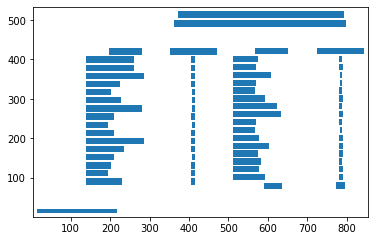

In [41]:
filename = "../data_download/data_source/gpo_interinstitucional/homicidios_13092020_v2.pdf"
tables = camelot.read_pdf(filename,flavor = "stream")
camelot.plot(tables[0], kind='text').show
destination = "../data_raw/gpo_interinsitucional/"  
tables.export(destination  + path + ".csv", f="csv", compress=True)
#print(tables[0])
#camelot.plot(tables[0], kind='textedge').show()

In [49]:
df = pd.read_csv("/Users/marianafernandez/Documents/PADeCI/homicides-mx-data/data_raw/gpo_interinsitucional/homicidios_13092020_v2-page-1-table-1.csv")

In [50]:
df

,Entidades,Septiembre 13,Entidades.1,Septiembre 13.1
0,Aguascalientes,0.0,Morelos,3.0
1,Baja California,9.0,Nayarit,0.0
2,NaN,NaN,Nuevo León,1.0
3,Baja California Sur,0.0,NaN,NaN
4,NaN,NaN,Oaxaca,1.0
5,Campeche,0.0,NaN,NaN
6,NaN,NaN,Puebla,5.0
7,Chiapas,3.0,NaN,NaN
8,NaN,NaN,Querétaro,0.0
9,Chihuahua,6.0,NaN,NaN


In [55]:
df = pd.Series(df.values.ravel('F'))
df

0           Aguascalientes
1          Baja California
2                      NaN
3      Baja California Sur
4                      NaN
              ...         
119                      0
120                    NaN
121                      4
122                    NaN
123                     84
Length: 124, dtype: object

In [57]:
df = pd.DataFrame(data=df)

,0
0,Aguascalientes
1,Baja California
2,NaN
3,Baja California Sur
4,NaN
...,...
119,0
120,NaN
121,4
122,NaN
